# A/B testing with Kaggle product analytics dataset

Data provided by Kaggle: https://www.kaggle.com/podsyp/how-to-do-product-analytics

Context:

Online store of sporting goods: clothing, shoes, accessories and sports nutrition.

Content:

On the main page of the store they show users banners in order to stimulate their sales. Now one of 5 banners is randomly displayed there. Each banner advertises a specific product or the entire company. Our marketers believe that the experience with banners can vary by segment, and their effectiveness may depend on the characteristics of user behavior.

Acknowledgements:

The manager of the company had an offer from partners to sell this place for a banner and advertise another service there (payment is assumed according to the CPC (cost-per-click) model).

Inspiration:

Help the manager make a decision.
Does the banner advertised significantly impact the user experience?
How do users behave in each segment?

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
import scipy.stats as stats

In [2]:
## load the dataset
df = pd.read_csv('product.csv')
df

,order_id,user_id,page_id,product,site_version,time,title,target
0,cfcd208495d565ef66e7dff9f98764da,c81e728d9d4c2f636f067f89cc14862c,6f4922f45568161a8cdf4ad2299f6d23,sneakers,desktop,2019-01-11 09:24:43,banner_click,0
1,c4ca4238a0b923820dcc509a6f75849b,eccbc87e4b5ce2fe28308fd9f2a7baf3,4e732ced3463d06de0ca9a15b6153677,sneakers,desktop,2019-01-09 09:38:51,banner_show,0
2,c81e728d9d4c2f636f067f89cc14862c,eccbc87e4b5ce2fe28308fd9f2a7baf3,5c45a86277b8bf17bff6011be5cfb1b9,sports_nutrition,desktop,2019-01-09 09:12:45,banner_show,0
3,eccbc87e4b5ce2fe28308fd9f2a7baf3,eccbc87e4b5ce2fe28308fd9f2a7baf3,fb339ad311d50a229e497085aad219c7,company,desktop,2019-01-03 08:58:18,banner_show,0
4,a87ff679a2f3e71d9181a67b7542122c,eccbc87e4b5ce2fe28308fd9f2a7baf3,fb339ad311d50a229e497085aad219c7,company,desktop,2019-01-03 08:59:15,banner_click,0
...,...,...,...,...,...,...,...,...
8471215,70c275428b8d53eef294d0529253b694,59e736f90b5f8003072bf0eb271ddb86,7bc3a33568d00773d5b58d6c7348bf3e,accessories,desktop,2019-05-23 14:07:00,banner_show,0
8471216,94c9a2a0c11c2b88e49c13e401608c86,69d73bfcaaa83217c903627e602ae01c,f236830bcbb2d279c0c7c3d7f5d3a970,clothes,mobile,2019-05-28 08:10:20,banner_show,0
8471217,862568e6013bc378b06f43c3e466521a,61728d26a9c9feb9e128c17b400062c8,4fc14437e418f19200e71acf4f34b3ba,sports_nutrition,mobile,2019-05-20 09:20:50,banner_show,0
8471218,7c70b42806372ba85f47a3956f23a114,f90e8c3bcf3867e65d62a2a08189a35a,c6a3e7758b9c0a43417c4a2c1a4504dd,sneakers,mobile,2019-05-28 19:25:42,banner_show,0


# Explore dataset

In [3]:
#count number of unique users
df.user_id.count()

8471220

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8471220 entries, 0 to 8471219
Data columns (total 8 columns):
order_id        object
user_id         object
page_id         object
product         object
site_version    object
time            object
title           object
target          int64
dtypes: int64(1), object(7)
memory usage: 517.0+ MB


In [11]:
#check for missing values
df.isna().sum()

order_id        0
user_id         0
page_id         0
product         0
site_version    0
time            0
title           0
target          0
dtype: int64

In [15]:
#there are products - accessories, clothes, sneakers, sports_nutrition
df.groupby('product').nunique()

# ** REMOVE COMPANY - NOT A PRODUCT

,order_id,user_id,page_id,product,site_version,time,title,target
product,,,,,,,,
accessories,1621759,1184117,1440955,1,2,1497249,3,2
clothes,1786438,1236557,1453129,1,2,1637506,3,2
company,1725056,1256719,1580235,1,2,1586206,2,1
sneakers,1703342,1206801,1453029,1,2,1566423,3,2
sports_nutrition,1634625,1187949,1465971,1,2,1507095,3,2


In [16]:
# there are two site versions - desktop and mobile
df.groupby('site_version').nunique()

,order_id,user_id,page_id,product,site_version,time,title,target
site_version,,,,,,,,
desktop,2382885,1424772,2134641,5,1,2125447,3,2
mobile,6088335,2857187,5258676,5,1,4594580,3,2


In [22]:
#there are three titles, which are types of actions (i think) - banner_click, banner_show, order
df.groupby('title').nunique()

,order_id,user_id,page_id,product,site_version,time,title,target
title,,,,,,,,
banner_click,829184,742458,829184,5,2,795676,1,1
banner_show,7393314,4254618,7393314,5,2,5273211,1,1
order,248722,237866,1,4,2,246179,1,1


In [23]:
# there are two targets
df.groupby('target').nunique()

,order_id,user_id,page_id,product,site_version,time,title,target
target,,,,,,,,
0,8222498,4254619,7393315,5,2,5666540,2,1
1,248722,237866,1,4,2,246179,1,1


In [ ]:
## explore distributions

In [ ]:
## what is the research question

In [ ]:
## perform hypothesis tests
##welch_t(a,b)
##welch_df(a,b)
##p_value(a,b, two_sided=False) <-- this is 2x the p value from a 1sided test


In [19]:
#subset the appropriate data into 2 groups

In [20]:
#investigate percentiles

# ML algorithms for analytics

from https://www.kaggle.com/podsyp/simple-start-trivial-ml-algorithms-for-analytics

In [6]:
import datetime

#import pandas_summary as ps
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from xgboost.sklearn import XGBClassifier
from xgboost import plot_importance

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('use_inf_as_na', True)
random_state = 17

In [4]:
df['time'] = df['time'].apply(pd.to_datetime)

order_id
1    8471220
dtype: int64


page_id
1    8471220
dtype: int64


title
banner_show     7393314
banner_click     829184
order            248722
dtype: int64


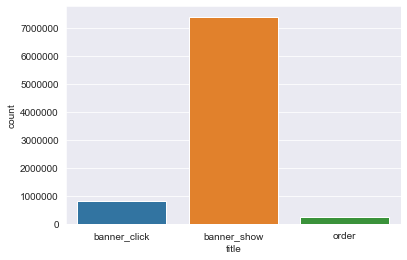

In [12]:
for i in ('order_id', 'page_id'):
        df[i] = df[i].fillna(0).apply(lambda x: X if x == 0 else 1)
        print(df.groupby([i]).size().sort_values(ascending=False).head(2))
        print('\n')
print(df.groupby(['title']).size().sort_values(ascending=False).head())
sns.countplot('title', data=df)
plt.show();
df.drop(['order_id', 'page_id'], axis=1, inplace=True)